# Objective: 

To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above)

=>Perform Data Preparation by cleaning the data and removing null values.

=>Identify the genres which are more significant and do simple analysis for the distribution according to genres.

=>Identify Which genres have higher user ratings. 

=>Identify trend of user rating based on pricing.



# Reading from csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

readdata = pd.read_csv(r'F:\ML(intern)\Project1\appstore_games.csv')
#print(readdata)
#index = np.array(readdata.loc[:,"ID"])
data1 = np.array(readdata.loc[:,"ID":"Name"])
#data
data2 = np.array(readdata.loc[:,"Average User Rating":"Price"])
data3 = np.array(readdata.loc[:,"Size":"Genres"])
FD1 = np.concatenate((data1,data2),axis=1)
FD2 = np.concatenate((FD1,data3),axis=1)
FD2
finaldata = pd.DataFrame(FD2,columns=['ID','Name','Average User Rating','User Rating Count','Price','Size','Primary Genre','Genres'])
#finaldata

index = np.array(finaldata.loc[:,"ID"])
finaldata.drop(['ID'], axis = 1, inplace = True)
finaldata.index = index
finaldata = finaldata.rename_axis("ID")
#finaldata

# Information of the dataframe

In [3]:
print(finaldata.info())
print("\n")

print("\n Shape = ",finaldata.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 7 columns):
Name                   17007 non-null object
Average User Rating    7561 non-null object
User Rating Count      7561 non-null object
Price                  16983 non-null object
Size                   17006 non-null object
Primary Genre          17007 non-null object
Genres                 17007 non-null object
dtypes: object(7)
memory usage: 1.0+ MB
None



 Shape =  (17007, 7)


In [4]:
#Dropping all null values

finaldata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

finaldata = finaldata.loc[:,:].dropna()
#finaldata.isnull().sum()
#finaldata.isnull()
#finaldata

In [5]:
#Removing Duplicates

finaldata = finaldata.drop_duplicates()
#finaldata

In [6]:
#Sorting data based on User rating Count

finaldata.sort_values('User Rating Count', axis = 0, ascending = False, inplace = True, na_position ='last') 
#finaldata


In [7]:
unique_genres = finaldata["Genres"].unique()
#print(unique_genres)
print("Unique genre count= ",len(unique_genres))

Unique genre count=  623


# Finding Count of Unique Genre in the dataset

In [8]:
unique_genres = list(finaldata["Genres"].unique())
GENRESDATA = list(finaldata["Genres"])
Genre_count = {}
G_count = []
c = 0

for i in unique_genres:
    c=0
    for j in GENRESDATA:
        if(i==j):
            c=c+1
    
    Genre_count[i] = c
    G_count.append(c)
    
    
Genre_data = pd.DataFrame(Genre_count,index=['Count'])
Genre_data = Genre_data.T

#Sorting according to count
Genre_data.sort_values('Count', axis = 0, ascending = False, inplace = True, na_position ='last')



<Figure size 432x288 with 0 Axes>

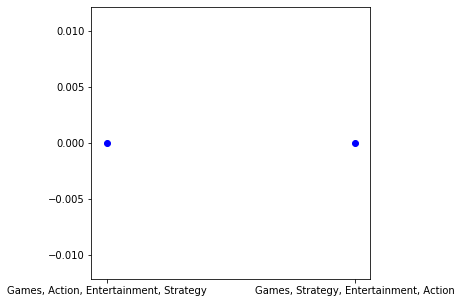

<Figure size 432x288 with 0 Axes>

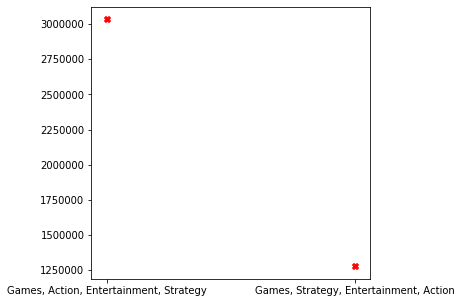

In [9]:

graph1 = finaldata.head(2)
plt.figure(1)
plt.figure(figsize=(5,5))
plt.scatter( 'Genres', 'Price', data=graph1, marker='o', color='blue')
plt.show()
plt.figure(2)
plt.figure(figsize=(5,5))
plt.scatter( 'Genres', 'User Rating Count', data=graph1, marker='X', color='red')
plt.show()


<Figure size 432x288 with 0 Axes>

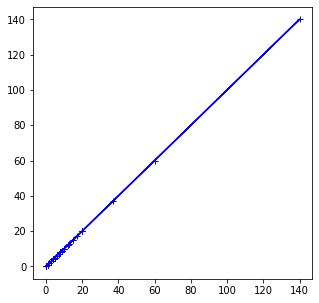

<Figure size 432x288 with 0 Axes>

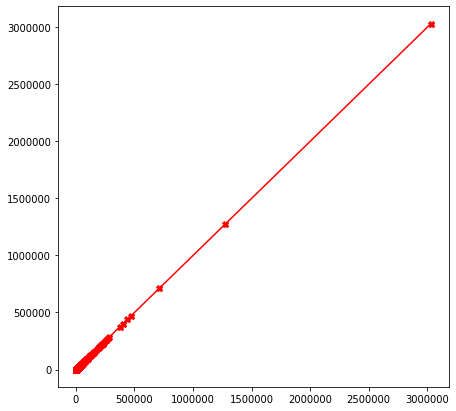

In [10]:
#plotting line graph for Price and User rating count
plt.figure(1)
plt.figure(figsize=(5,5))
plt.plot('Price','Price',data=finaldata,marker='+',color='blue')
plt.show()
plt.figure(2)
plt.figure(figsize=(7,7))
plt.plot('User Rating Count','User Rating Count',data=finaldata,marker='X',color='red')
plt.show()

In [11]:
#Slicing data whose Average User Rating is more than 4
finaldata.sort_values('Average User Rating', axis = 0, ascending = False, inplace = True, na_position ='last') 
#finaldata
condition=finaldata['Average User Rating']>=4

finaldata = finaldata[condition]
#Shape of new Data
print(finaldata.shape,"\n")
#finaldata

(5523, 7) 



In [12]:
data_price_zero = finaldata['Price']==0
Data1 = finaldata[data_price_zero] #Data frame with price = 0
data_price_NotZero = finaldata['Price']>0
Data2 = finaldata[data_price_NotZero] #Data Frame with price >0


# Working with price > 0

In [29]:
# Working with price > 0 

Data2.sort_values('User Rating Count', axis = 0, ascending = False, inplace = True, na_position ='last')
unique_genres2 = list(Data2["Genres"].unique())
data2  = list(Data2["Genres"])
print("Shape = ",Data2.shape,"\n")
print("Shape = ",len(unique_genres2),"\n")

Genre_count_data2 = {}
G_count_data2 = []
c = 0

for i in unique_genres2:
    c=0
    for j in data2:
        if(i==j):
            c=c+1
    
    Genre_count_data2[i] = c
    G_count_data2.append(c)
    
    
Genre_data2 = pd.DataFrame(Genre_count_data2,index=['Count'])
Genre_data2 = Genre_data2.T

#Sorting according to count
Genre_data2.sort_values('Count', axis = 0, ascending = False, inplace = True, na_position ='last')
print(Genre_data2,"\n")
max_genre_data2 = Data2['Genres']=='Games, Strategy, Simulation'
Genre_maxcount = Data2[max_genre_data2]
Genre_maxcount


Shape =  (879, 7) 

Shape =  156 

                                                    Count
Games, Strategy, Simulation                            49
Games, Simulation, Strategy                            42
Games, Strategy, Puzzle                                39
Games, Role Playing, Strategy                          35
Games, Strategy, Role Playing                          32
Games, Puzzle, Strategy                                30
Games, Board, Strategy                                 29
Games, Action, Strategy                                23
Games, Strategy, Board                                 21
Games, Strategy, Action                                20
Games, Strategy, Entertainment, Simulation             19
Games, Strategy, Board, Entertainment                  18
Games, Entertainment, Board, Strategy                  16
Games, Strategy, Entertainment, Puzzle                 15
Games, Puzzle, Strategy, Entertainment                 15
Games, Strategy                      

,Name,Average User Rating,User Rating Count,Price,Size,Primary Genre,Genres
ID,,,,,,,
525818839,Plague Inc.,4.5,205014,0.99,1.18793e+08,Games,"Games, Strategy, Simulation"
941143328,"""Five Nights at Freddy's 2""",4.5,20707,2.99,3.7631e+07,Games,"Games, Strategy, Simulation"
833951143,FTL: Faster Than Light,4.5,4136,9.99,1.79816e+08,Games,"Games, Strategy, Simulation"
632079234,Star Command,4,3636,2.99,1.1602e+08,Games,"Games, Strategy, Simulation"
715822238,"""Papa's Freezeria HD""",4.5,2786,2.99,6.36723e+07,Games,"Games, Strategy, Simulation"
913585516,Ultimate General\u2122: Gettysburg,4.5,2345,3.99,2.93022e+08,Games,"Games, Strategy, Simulation"
438375580,Starbase Orion,4.5,2295,7.99,2.61959e+08,Games,"Games, Strategy, Simulation"
1330451888,Pocket City,4.5,1966,3.99,2.69763e+07,Games,"Games, Strategy, Simulation"
542397575,Space Agency,4.5,1927,1.99,3.7505e+07,Games,"Games, Strategy, Simulation"


In [52]:
print("Mean = ",Genre_maxcount['User Rating Count'].mean(),"\n","S.D = ",Genre_maxcount['User Rating Count'].std(),"\n","Meadian = ",Genre_maxcount['User Rating Count'].median(),"\n")

Mean =  5223.755102040816 
 S.D =  29293.33348258796 
 Meadian =  188.0 



From the above table we can see that Games, Strategy, Simulation has maximum count in the entire dataset.

The Games, Strategy, Simulation combination of genre has MAX(User Rating count) of 205014 and Max(Average User Rating) of 5


<Figure size 432x288 with 0 Axes>

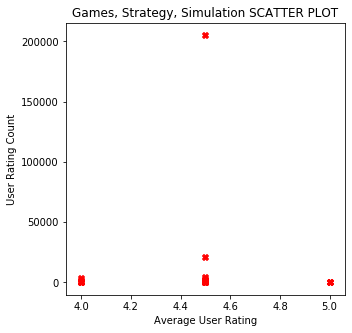

In [33]:
plt.figure(1)
plt.figure(figsize=(5,5))
plt.scatter( 'Average User Rating', 'User Rating Count', data=Genre_maxcount, marker='X', color='red')
plt.title('Games, Strategy, Simulation SCATTER PLOT')
plt.xlabel('Average User Rating')
plt.ylabel('User Rating Count')
plt.show()

# Working with price = = 0

In [36]:
#Working with price = = 0

Data1.sort_values('User Rating Count', axis = 0, ascending = False, inplace = True, na_position ='last')
unique_genres1 = list(Data1["Genres"].unique())
data1  = list(Data1["Genres"])
print("Shape = ",Data1.shape,"\n")
print("Shape = ",len(unique_genres1),"\n")

Genre_count_data1 = {}
G_count_data1 = []
c = 0

for i in unique_genres1:
    c=0
    for j in data1:
        if(i==j):
            c=c+1
    
    Genre_count_data1[i] = c
    G_count_data1.append(c)
    
    
Genre_data1 = pd.DataFrame(Genre_count_data1,index=['Count'])
Genre_data1 = Genre_data1.T

#Sorting according to count
Genre_data1.sort_values('Count', axis = 0, ascending = False, inplace = True, na_position ='last')
print(Genre_data1,"\n")
max_genre_data1 = Data1['Genres']=='Games, Strategy, Action'
Genre_maxcount1 = Data1[max_genre_data1]
Genre_maxcount1



Shape =  (4644, 7) 

Shape =  481 

                                               Count
Games, Strategy, Action                          175
Games, Simulation, Strategy                      165
Games, Strategy, Puzzle                          160
Games, Strategy, Simulation                      154
Games, Strategy                                  146
Games, Puzzle, Strategy                          141
Games, Action, Strategy                          141
Games, Strategy, Role Playing                    116
Games, Role Playing, Strategy                    103
Games, Strategy, Puzzle, Entertainment            94
Games, Strategy, Entertainment, Puzzle            80
Games, Entertainment, Puzzle, Strategy            78
Games, Puzzle, Strategy, Entertainment            78
Games, Casual, Strategy                           73
Games, Strategy, Casual                           69
Games, Action, Strategy, Entertainment            68
Games, Strategy, Entertainment, Action            63
Games, Boa

,Name,Average User Rating,User Rating Count,Price,Size,Primary Genre,Genres
ID,,,,,,,
672150402,Boom Beach,4.5,400787,0,2.02786e+08,Games,"Games, Strategy, Action"
1356882421,ZombsRoyale.io,4.5,71752,0,2.19518e+08,Games,"Games, Strategy, Action"
1035663788,Survival Arena\u2122 TD,4.5,61875,0,1.83353e+08,Games,"Games, Strategy, Action"
1035712810,Game of Thrones: Conquest\u2122,4.5,51396,0,1.65966e+08,Games,"Games, Strategy, Action"
643798619,Samurai Siege: Alliance Wars,4.5,48689,0,1.57049e+08,Games,"Games, Strategy, Action"
880017562,Alien Creeps TD,4.5,25446,0,1.70573e+08,Games,"Games, Strategy, Action"
979873043,WarFriends: PvP Army Shooter,4.5,23601,0,1.09432e+09,Games,"Games, Strategy, Action"
1178777377,Noblemen: 1896,5,20329,0,1.0199e+09,Games,"Games, Strategy, Action"
500387023,"""Towers N' Trolls HD""",4.5,15906,0,3.18954e+08,Games,"Games, Strategy, Action"


In [53]:
print("Mean = ",Genre_maxcount1['User Rating Count'].mean(),"\n","S.D = ",Genre_maxcount1['User Rating Count'].std(),"\n","Meadian = ",Genre_maxcount1['User Rating Count'].median(),"\n")


Mean =  5049.16 
 S.D =  31527.162484056378 
 Meadian =  89.0 



From the above table we can see that Games, Strategy, Action has maximum count in the entire dataset.

The Games, Strategy, Simulation combination of genre has MAX(User Rating count) of 400787 and Max(Average User Rating) of 5


<Figure size 432x288 with 0 Axes>

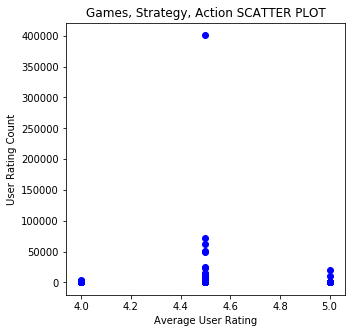

In [44]:
plt.figure(2)
plt.figure(figsize=(5,5))
plt.scatter( 'Average User Rating', 'User Rating Count', data=Genre_maxcount1, marker='o', color='blue')
plt.title('Games, Strategy, Action SCATTER PLOT')
plt.xlabel('Average User Rating')
plt.ylabel('User Rating Count')
plt.show()

In [62]:
DICT = {'Games, Strategy, Action':{'Mean' : 5049 ,'S.D' : 31527 ,'Median' : 89 },'Games, Strategy, Stimulation':{'Mean':5224,'S.D': 29293 ,'Median':188}}
Mean_Median_SD = pd.DataFrame(DICT)
Mean_Median_SD

,"Games, Strategy, Action","Games, Strategy, Stimulation"
Mean,5049,5224
Median,89,188
S.D,31527,29293


The Price and User Rating Count are Inversely proportional

There is more Games with Average User Rating of 4.5

Games with 4.5 rating have the maximum User rating Count

The Game with max User Rating Count and Average User Rating more than 4 have least price(zero)

From the Above Two Scatter Plots The Games,Strategy,Action with price ==0 has User Rating Count of 400787 and Games, Strategy, Simulation with price>0 has User Rating Count of 205014

Hence The best best combination for strategy games available in the appstore in order to get a good user rating would be

Games, Strategy, Action 

Because, it has price==0 , Occurs more times in the dataset(most of the games have this combination), has Average User Rating >=4 and with maximum User Rating Count 